## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [282]:
data = pd.read_csv("./bank-additional-full.csv", sep=";")
display(data.head(3))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Статистична інформація:")
data.describe()

Статистична інформація:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
print(f"Розмірність датасету: {data.shape}")

Розмірність датасету: (41188, 21)


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [284]:
bank_target_map = {"yes": 1, "no": 0}
bank_target = data["y"].map(bank_target_map)

display(bank_target.head(3))

0    0
1    0
2    0
Name: y, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [285]:
bank_client = data[["age", "job", "marital", "education", "default", "housing", "loan"]]
bank_client_values = bank_client.value_counts()

def get_unique_values(df, column):
    return pd.DataFrame(df[column].value_counts())

for column in bank_client:
    display(get_unique_values(bank_client, column))

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


,count
default,
no,32588
unknown,8597
yes,3


,count
housing,
yes,21576
no,18622
unknown,990


,count
loan,
no,33950
yes,6248
unknown,990


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [286]:
def check_skew(sk, value):
    if sk > 0.1:
        print(f"Асиметрія графіку {value}: {sk}. Розподіл має важчий правий хвіст.")
    elif sk < -0.1:
        print(f"Асиметрія графіку {value}: {sk}. Розподіл має важчий лівий хвіст.")
    else:
        print(f"Асиметрія графіку {value}: {sk}. Розподіл відносно симетричний.")

Мінімальне значення:
17

Максимальне значення:
98

Кількість пропусків:
0


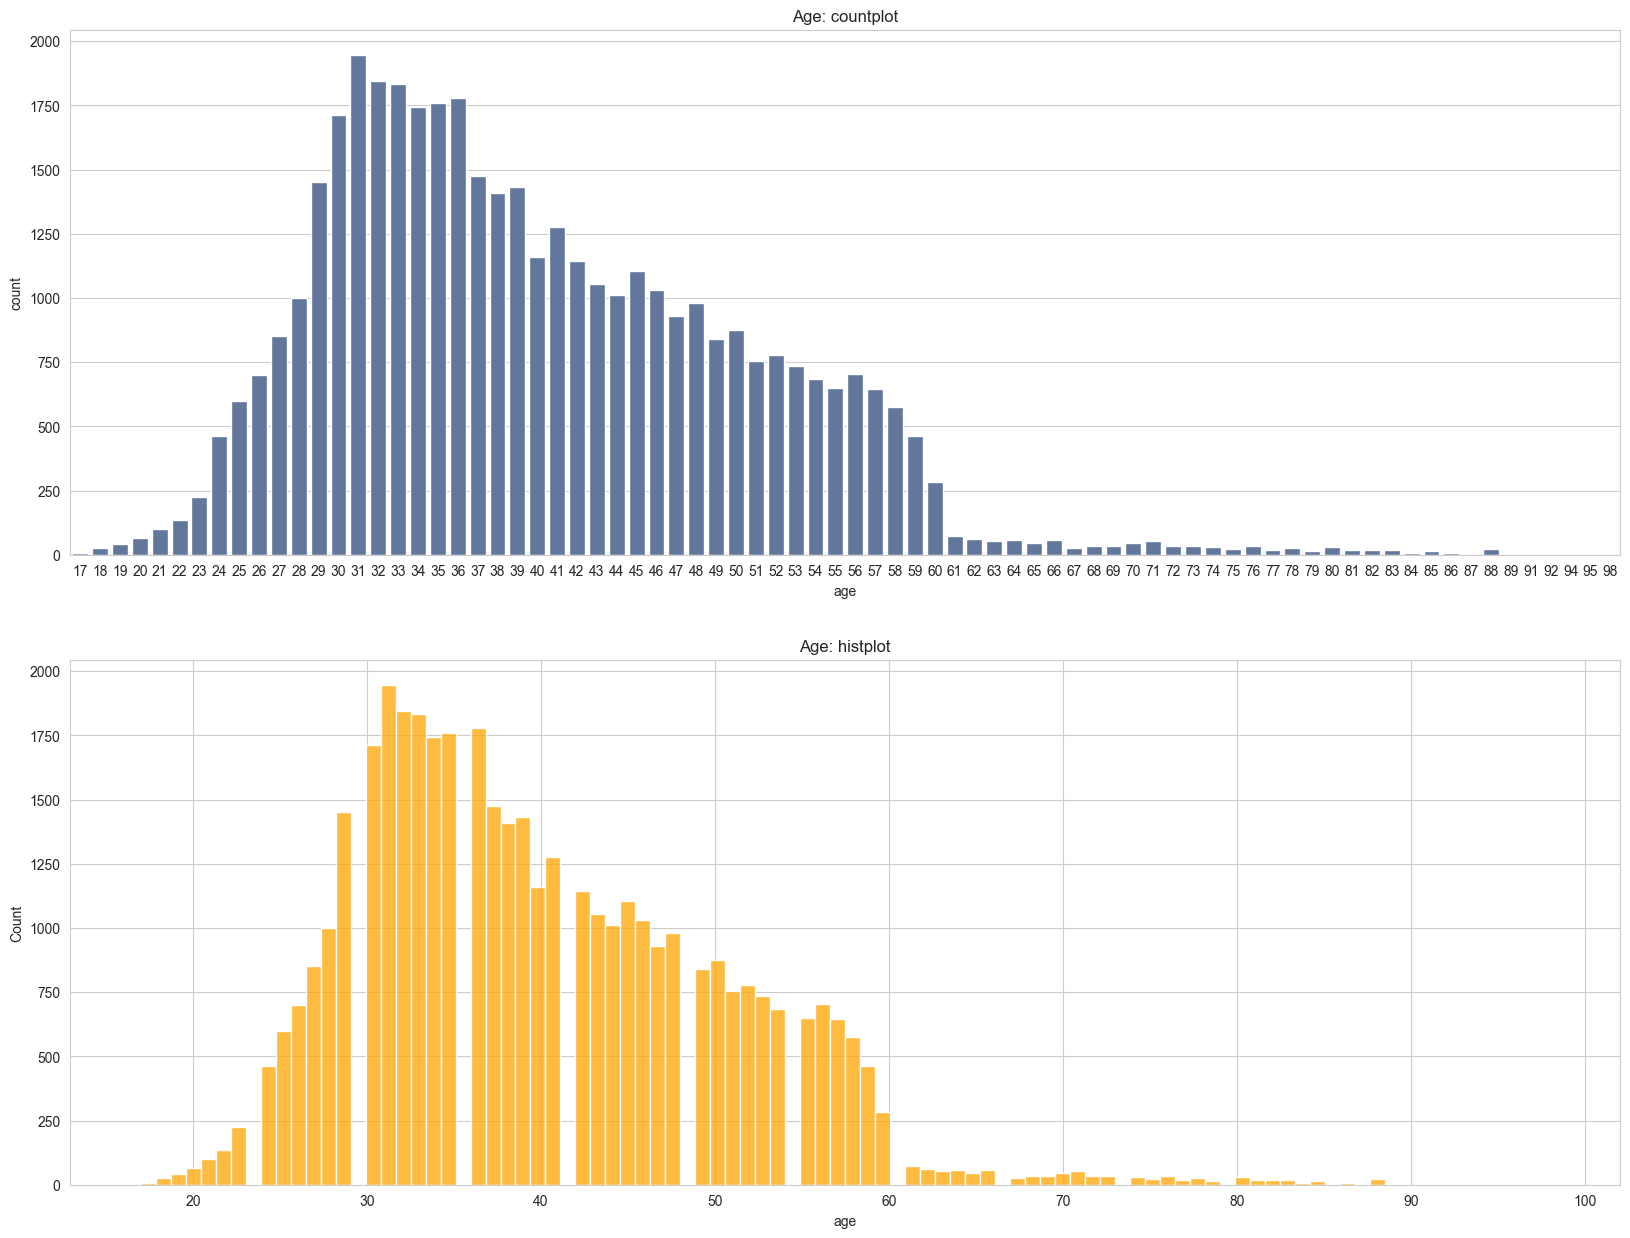

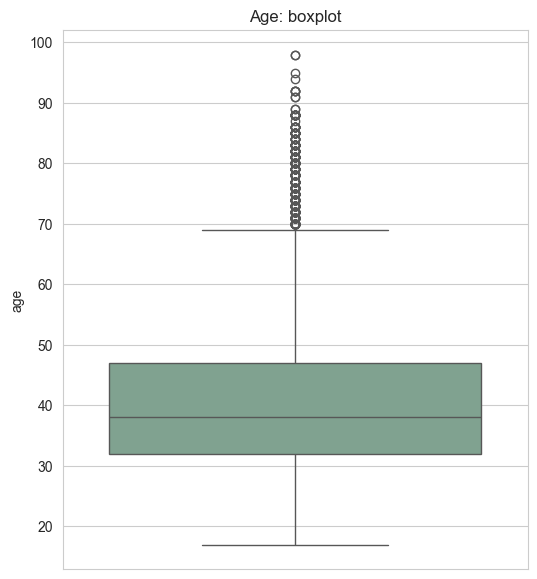

Асиметрія графіку age: 0.7846968157646645. Розподіл має важчий правий хвіст.


In [287]:
print("Мінімальне значення:")
print(data["age"].min())

print("\nМаксимальне значення:")
print(data["age"].max())

print("\nКількість пропусків:")
print(data["age"].isnull().sum())

fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(20, 15))

sns.countplot(data=data, x="age", ax=ax1, color="#5975A4")
ax1.set_title("Age: countplot")

sns.histplot(data=data, x="age", ax=ax2, color="orange")
ax2.set_title("Age: histplot")

fig, ax3 = plt.subplots(figsize=(6, 7))
sns.boxplot(data=data, y="age", ax=ax3, color="#7AA88F")
ax3.set_title("Age: boxplot")

plt.show()
# palette=['#5975A4', 'orange', '#7AA88F']

skewness = data["age"].skew()
check_skew(skewness, "age")

**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [288]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1

    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')

    low_lim = Q1 - (IQR * 1.5)
    up_lim = Q3 + (IQR * 1.5)

    print('')
    print(f"Lower bound: {low_lim}")
    print('')
    print(f"Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]

    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [172]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

Lower bound: -12.5

Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

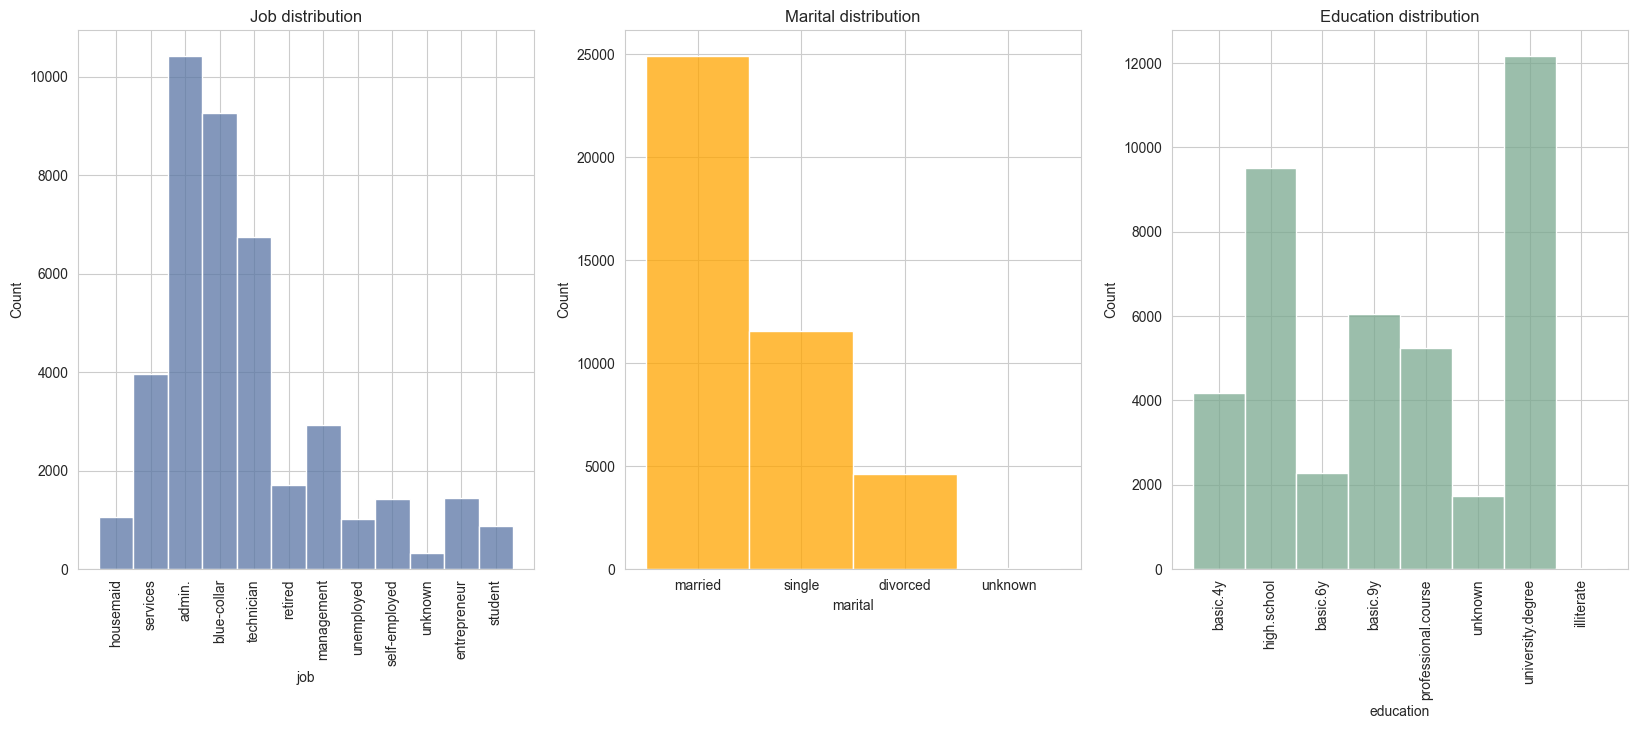

In [289]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=data, x="job", ax=ax1, color="#5975A4")
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Job distribution")

sns.histplot(data=data, x="marital", ax=ax2, color="orange")
ax2.set_title("Marital distribution")

sns.histplot(data=data, x="education", ax=ax3, color="#7AA88F")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Education distribution")

plt.show()

**Висновки з завдання 6 (детальні)**

1.   
2.   
3. ...

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

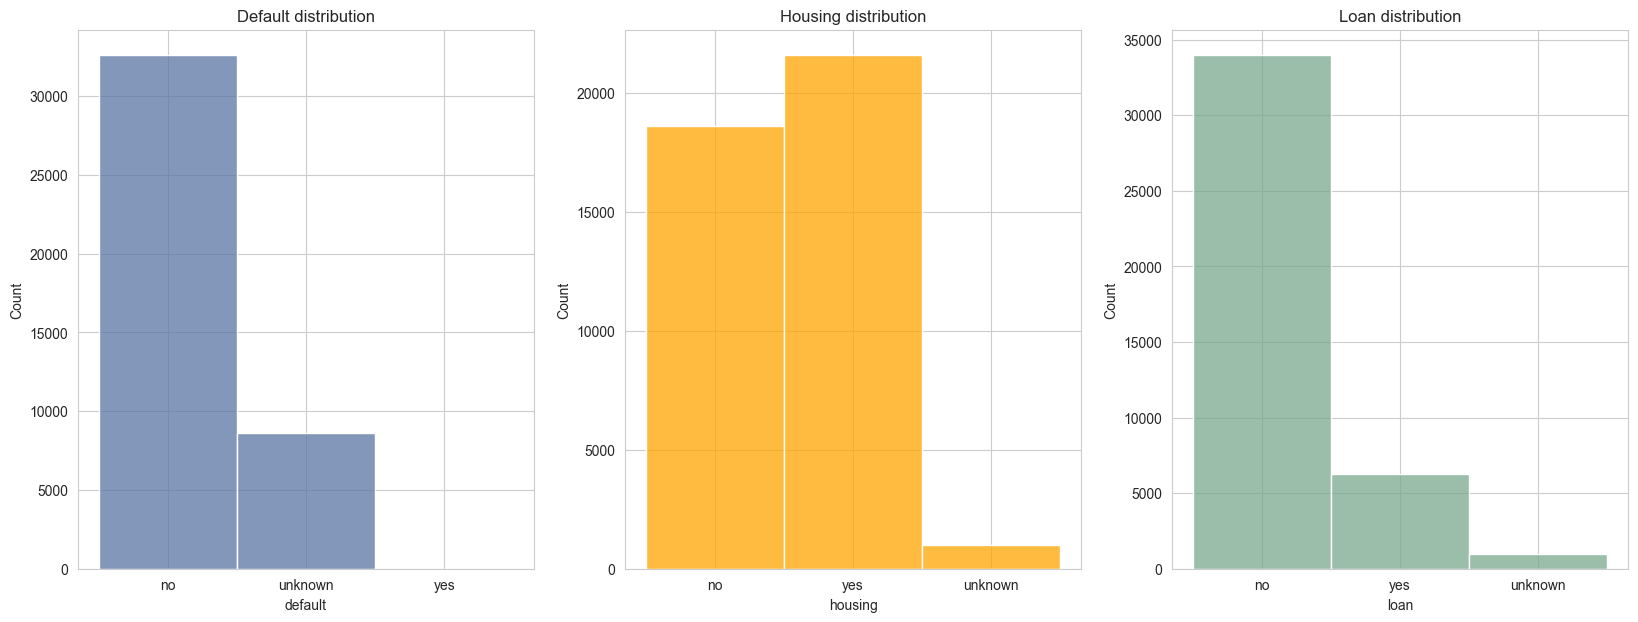

In [50]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=data, x="default", ax=ax1, color="#5975A4")
ax1.set_title("Default distribution")

sns.histplot(data=data, x="housing", ax=ax2, color="orange")
ax2.set_title("Housing distribution")

sns.histplot(data=data, x="loan", ax=ax3, color="#7AA88F")
ax3.set_title("Loan distribution")

plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [290]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = pd.notnull(df[col])
        df[col] = le.fit_transform(df.loc[not_null, col])
    return df

In [291]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

In [292]:
display(bank_client.head(3))

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0


age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [295]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  q_values = dataframe[age_col].quantile([0, 0.25, 0.5, 0.75, 1])
  q_labels = [1, 2, 3, 4]

  print(q_values)
  
  dataframe["age_bins"] = pd.cut(dataframe[age_col], bins=q_values, labels=q_labels, include_lowest=True)

  return dataframe

In [296]:
bank_client = encode_age(bank_client, 'age')
bank_client.head(3)

0.00    17.0
0.25    32.0
0.50    38.0
0.75    47.0
1.00    98.0
Name: age, dtype: float64


,age,job,marital,education,default,housing,loan,age_bins
0,56,3,1,0,0,0,0,4
1,57,7,1,3,1,0,0,4
2,37,7,1,3,0,2,0,2


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [297]:
bank_relat = data[["contact", "month", "day_of_week", "duration"]]
display(bank_relat.head(3))
bank_relat.isna().sum()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226


contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [197]:
def get_unique_values(df, cols):
    for col in cols:
        print(f"Column: {col}")
        display(df[col].unique().tolist())

In [198]:
get_unique_values(bank_relat, ["contact", "month", "day_of_week"])

Column: contact


['telephone', 'cellular']

Column: month


['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']

Column: day_of_week


['mon', 'tue', 'wed', 'thu', 'fri']

# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



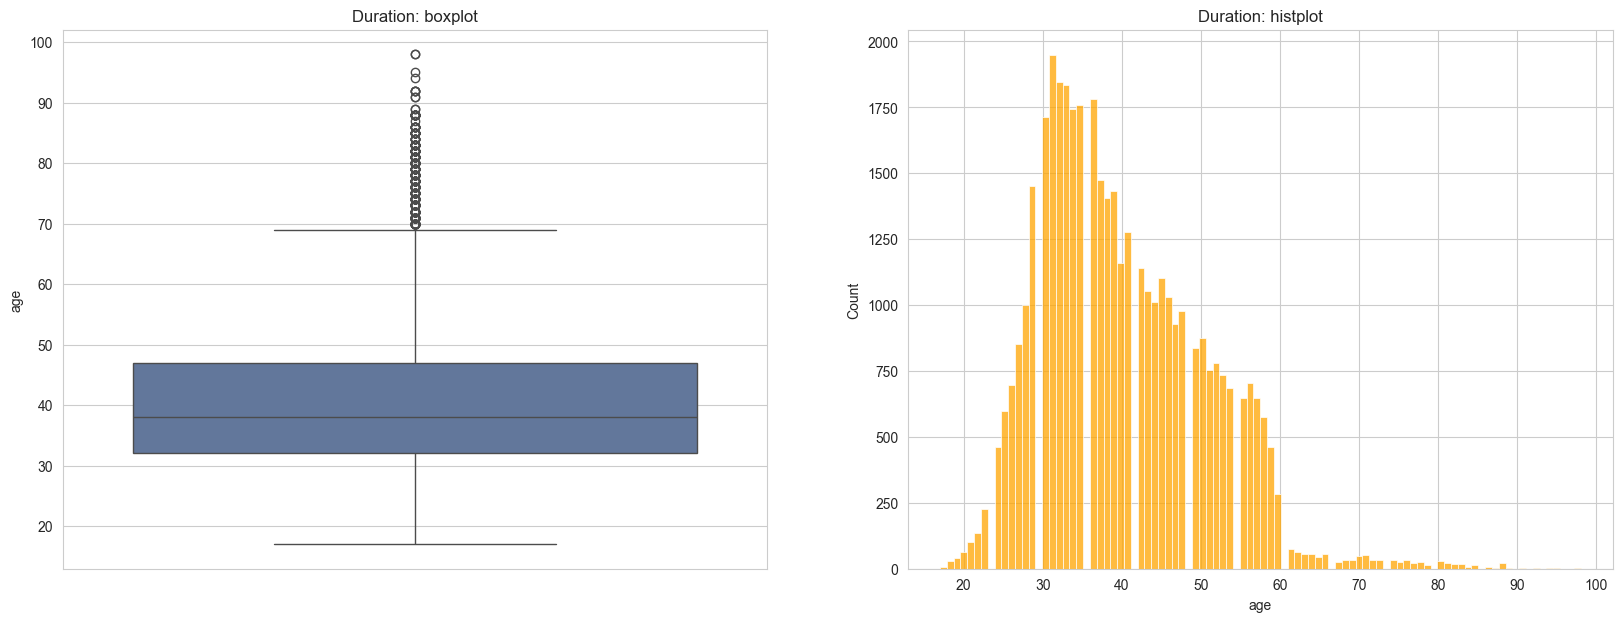

Асиметрія графіку duration: 3.263141255262832. Розподіл має важчий правий хвіст.


In [201]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(data=data, y="age", ax=ax1, color="#5975A4")
ax1.set_title("Duration: boxplot")

sns.histplot(data=data, x="age", ax=ax2, color="orange")
ax2.set_title("Duration: histplot")

plt.show()

skewness = data["duration"].skew()
check_skew(skewness, "duration")

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [298]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
display(bank_relat.head(3))

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [299]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  q_values = dataframe[duration_col].quantile([0, 0.25, 0.5, 0.75, 1])
  q_labels = [1, 2, 3, 4]

  print(q_values)
  
  dataframe["duration_bins"] = pd.cut(dataframe[duration_col], bins=q_values, labels=q_labels, include_lowest=True)
          
  return dataframe

In [300]:
bank_relat = encode_duration(bank_relat, 'duration')
display(bank_relat.head(3))

0.00       0.0
0.25     102.0
0.50     180.0
0.75     319.0
1.00    4918.0
Name: duration, dtype: float64


,contact,month,day_of_week,duration,duration_bins
0,1,6,1,261,3
1,1,6,1,149,2
2,1,6,1,226,3


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [301]:
bank_socec = data[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
display(bank_socec.head(3))

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [302]:
bank_other = data[["campaign", "pdays", "previous", "poutcome"]]
display(bank_other.head(3))

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [303]:
display(bank_other["poutcome"].unique().tolist())

bank_other = encode_categorical_columns(bank_other, ['poutcome'])
display(bank_other.head(3))

['nonexistent', 'failure', 'success']

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [309]:
bank_final= pd.concat([bank_client, bank_relat, bank_socec, bank_other, bank_target], axis=1)
bank_final = bank_final.drop(["age"], axis="columns")

display(bank_final.head(5))

print("Кількість пропусків:")
display(bank_final.isnull().sum())

,job,marital,education,default,housing,loan,age_bins,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,3,1,0,0,0,0,4,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
1,7,1,3,1,0,0,4,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
2,7,1,3,0,2,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
3,0,1,1,0,0,0,3,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
4,7,1,3,0,0,2,4,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0


Кількість пропусків:


job               0
marital           0
education         0
default           0
housing           0
loan              0
age_bins          0
contact           0
month             0
day_of_week       0
duration          0
duration_bins     0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

**Висновок:** Колонки `bank_final` містять тільки чисельні значення та не містять пропусків, що означає, що ми правильно перетворили всі дані і об'єднали в один датафрейм.

**Завдання 19** Провести ділення вибірки

In [322]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    
    X = X.drop("y", axis="columns")
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [323]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [324]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [325]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [346]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, logpred))

log_accuracy = round(accuracy_score(y_test, logpred),2)*100
print(f"\nAccuracy score: {log_accuracy}%")

log_precision = round(precision_score(y_test, logpred),2)*100
print(f"\nPrecision score: {log_precision}%")

log_recall = round(recall_score(y_test, logpred),2)*100
print(f"\nRecall score: {log_recall}%")

LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(f"\nCross-Validation Score: {LOGCV}")

Confusion matrix:
[[7073  206]
 [ 589  370]]

Accuracy score: 90.0%

Precision score: 64.0%

Recall score: 39.0%

Cross-Validation Score: 0.9041052743337776


1. **True Negatives:** 7073
2. **False Positives:** 206
3. **False Negatives:** 589
4. **True Positives:** 370

## k-NN

k=1 88.41 (+/- 0.46)
k=2 89.79 (+/- 0.55)
k=3 89.82 (+/- 0.48)
k=4 90.22 (+/- 0.45)
k=5 90.18 (+/- 0.65)
k=6 90.48 (+/- 0.57)
k=7 90.55 (+/- 0.57)
k=8 90.60 (+/- 0.46)
k=9 90.72 (+/- 0.52)
k=10 90.70 (+/- 0.53)
k=11 90.85 (+/- 0.59)
k=12 90.73 (+/- 0.60)
k=13 90.87 (+/- 0.59)
k=14 90.77 (+/- 0.57)
k=15 90.90 (+/- 0.58)
k=16 90.75 (+/- 0.56)
k=17 90.87 (+/- 0.59)
k=18 90.83 (+/- 0.52)
k=19 90.94 (+/- 0.60)
k=20 90.82 (+/- 0.47)
k=21 90.91 (+/- 0.49)
k=22 90.85 (+/- 0.48)
k=23 90.85 (+/- 0.53)
k=24 90.83 (+/- 0.50)
k=25 90.87 (+/- 0.51)
The optimal number of neighbors is 18 with 90.9%


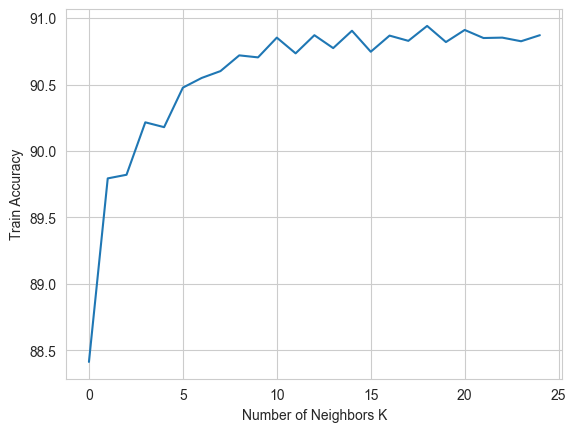

In [341]:
neighbors = np.arange(0,25)
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [347]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, knnpred))

knn_accuracy = round(accuracy_score(y_test, knnpred),2)*100
print(f"\nAccuracy score: {knn_accuracy}%")

knn_precision = round(precision_score(y_test, knnpred),2)*100
print(f"\nPrecision score: {knn_precision}%")

knn_recall = round(recall_score(y_test, knnpred),2)*100
print(f"\nRecall score: {knn_recall}%")

KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(f"\nKNNCV score: {KNNCV}")

Confusion matrix:
[[7131  148]
 [ 640  319]]

Accuracy score: 90.0%

Precision score: 68.0%

Recall score: 33.0%

KNNCV score: 0.9003437282497139


1. **True Negatives:** 7131
2. **False Positives:** 148
3. **False Negatives:** 640
4. **True Positives:** 329

## Логістична Регресія

In [355]:
models = pd.DataFrame({
                'Models': ["Логістична регресія", "Метод k-найближчих сусідів"],
                'Accuracy score':  [log_accuracy, knn_accuracy],
                'Precision score': [log_precision, knn_precision],
                "Recall score": [log_precision, knn_precision],
                "CV score": [LOGCV, KNNCV]
                })

models.sort_values(by='CV score', ascending=False)
display(models)

,Models,Accuracy score,Precision score,Recall score,CV score
0,Логістична регресія,90.0,64.0,64.0,0.904105
1,Метод k-найближчих сусідів,90.0,68.0,68.0,0.900344


**Висновки по моделям (детальні)**

1.   
2.   
3. ...